<a href="https://colab.research.google.com/github/leoUninova/Batch-TA-SI-/blob/master/250_tasi_bubble_report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [5]:
#@title Install packagages to read czi files 
pip install -q czifile

     |████████████████████████████████| 133kB 4.4MB/s 


In [0]:
#@title import packaged 
import pandas as pd
from czifile import CziFile
import os 
import glob
from matplotlib import pylab
import matplotlib.pyplot as plt
from google.colab import widgets


In [0]:
#@title mount sheet 
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [13]:
#@title drive mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title sheet list/ display tables
def sheet_list(name): 
  listOfdf=[]
  listOfStr=[]
  sh = gc.open(name)
  for i in range (len(sh.worksheets())):
    worksheet=sh.get_worksheet(i)
    rows = worksheet.get_all_values()
    headers = rows.pop(0)
    df = pd.DataFrame(rows, columns=headers)
    listOfdf.append(df)
    listOfStr.append(sh.get_worksheet(i).title)
  zipbObj = zip(listOfStr, listOfdf)
  dictOfWords = dict(zipbObj)
  return dictOfWords

def DisplayTables(dfdict):
  tb = widgets.TabBar(list(dfdict.keys()))
  for i, values in enumerate (dfdict.values()):
    with tb.output_to(i, select=(i < 1)):
      display(values)
      
      
      
      
def dicfordf (files):
  '''
  Takes a list of files, splits them on the first "-".
  Creates a dictioanry with the number as key and name as value. 
  When a key has been alreayd used, it appends.
  Creates a dataframe, sorts the collumns making then integers. 
  Returns the transpose of the dataframe.
  '''
  new_dict = {}
  for idx, file in enumerate(files):
    number, name = file.split('-',1)
    if number in new_dict:
        new_dict[number].append(file)
    else:
        new_dict[number] = [file] 
  df=pd.DataFrame.from_dict(new_dict, orient='index')
#   df.index = df.index.map(int)
#   df=df.sort_index()
  return (df.T)

def ImageTabFromdf(data):
  '''
  Takes a dataframe. 
  uses collumns as tab names. 
  Iterates over tab and creates tb2 subplots
  takes the filename and plots it czi . 
  '''  
  
  tb = widgets.TabBar(list(data.columns))
  for i, k in enumerate(list(data.columns)):
    with tb.output_to(i, select=(i < 1)):
      wid1=list(df[k].dropna())
      tb2 = widgets.TabBar(wid1, location='start') 
      for w in range(len(wid1)):
        with tb2.output_to(wid1[w],  select=(i < 1)):
          file=wid1[w]#str(k)+'-'+ str(wid1[w])
          with CziFile(file) as czi: #get image as array from czi format
               image_arrays = czi.asarray()
          images=image_arrays[0] 
          fig, ax = plt.subplots(figsize=(12, 8))
          ax.imshow(images)
          pylab.show()


#Report 

Clear bubblle formation is present. 

In [24]:
#@title table of process
sh = gc.open("TASI BACTH")
worksheet_list = sh.worksheets()

#create dictioanry with dataframe of sheets, keys are the names of the sheets 
tabledic=sheet_list("tasi 2 (6tr)")
DisplayTables(tabledic)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sample  ...                                             status
0               1-6  ...                                           good all
1                    ...                                                   
2    Die-deposition  ...                                                   
3            sample  ...                                              Notes
4               1-4  ...                              opened between layers
5               1-6  ...                                                   
6               3-6  ...                                                   
7                    ...                                                   
8                    ...                                                   
9                    ...                                                   
10  Die development  ...                                                   
11          samples  ...                                              notes
12              1-2  ...                                        photo 3012 
13          3-4-5-6  ...                         photoresist was coming out
14          2-3-4-6  ...  increased exposure time to incraese diff expos...
15               4-  ...                                                   
16                   ...                                                   
17        etchinig   ...                                                   
18              1-6  ...                                                   

[19 rows x 6 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

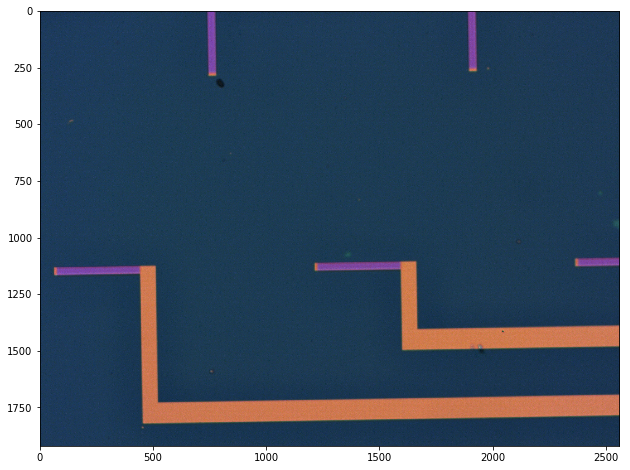

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

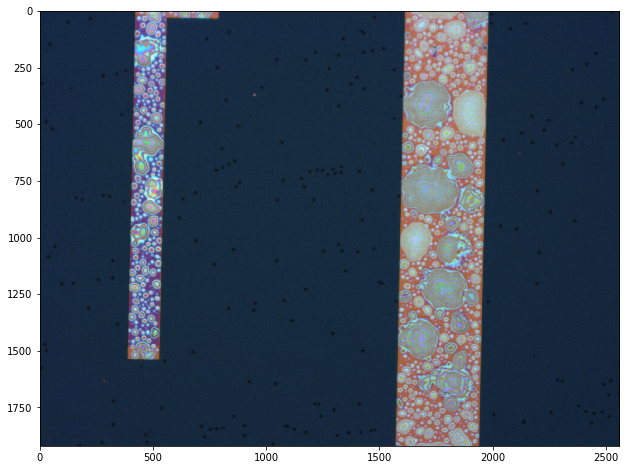

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

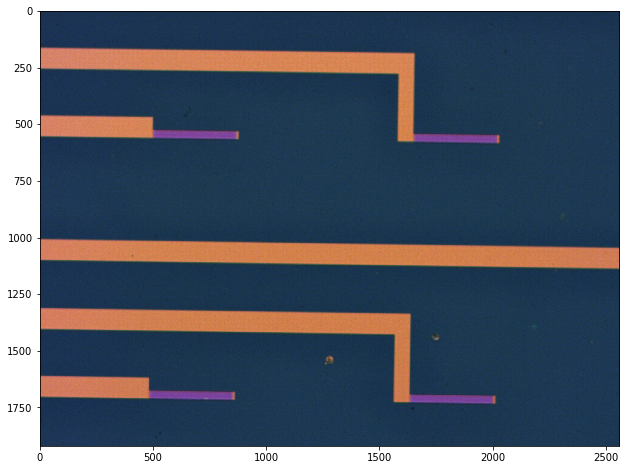

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

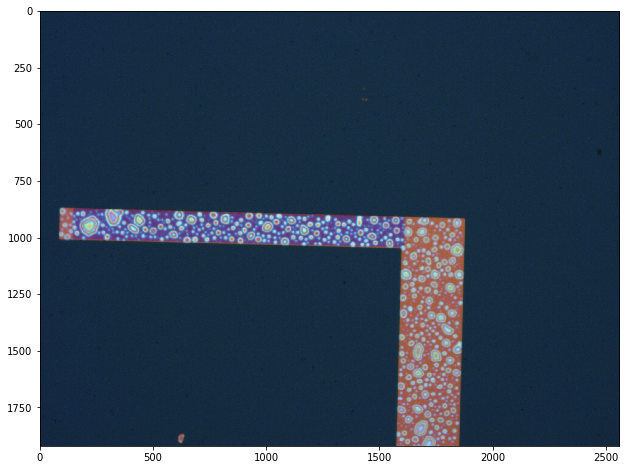

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

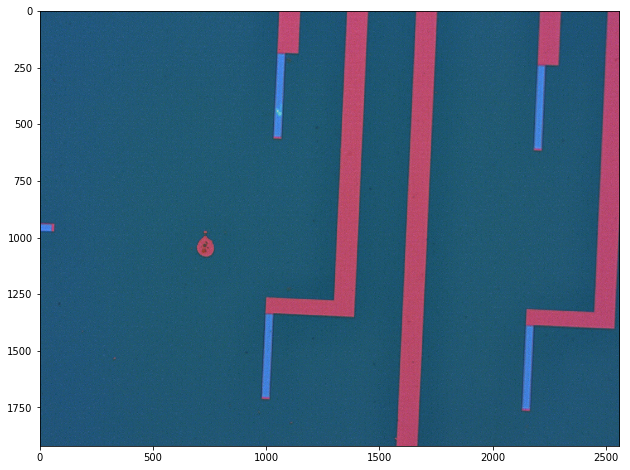

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

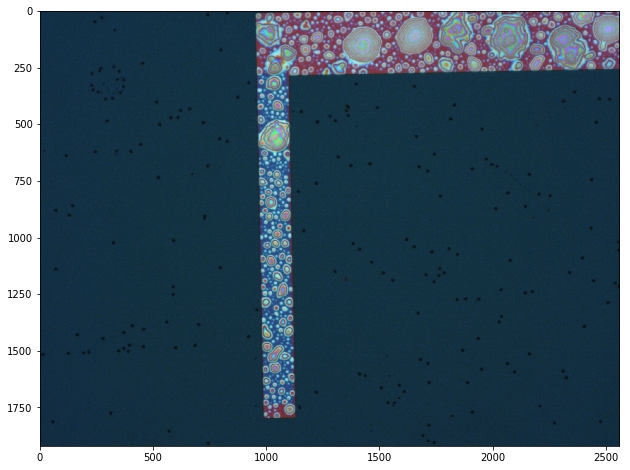

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

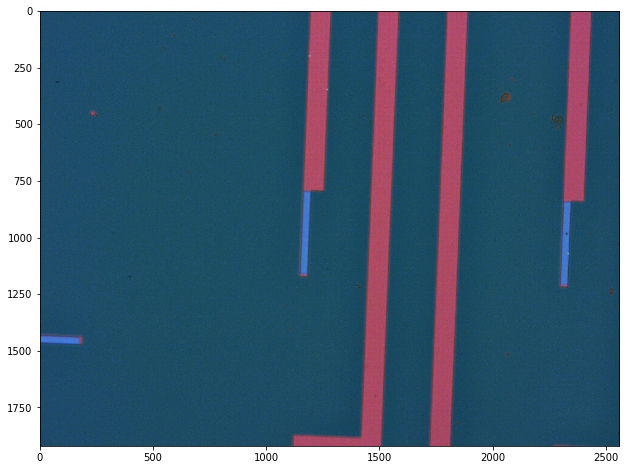

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

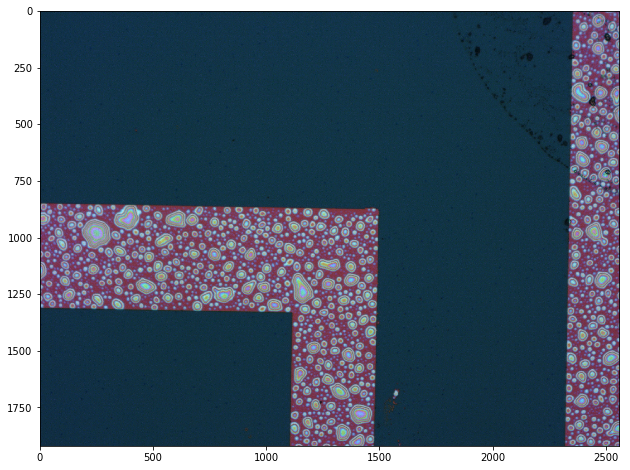

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

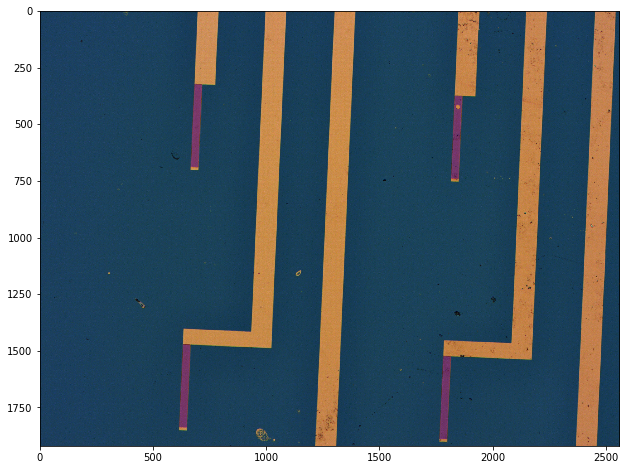

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

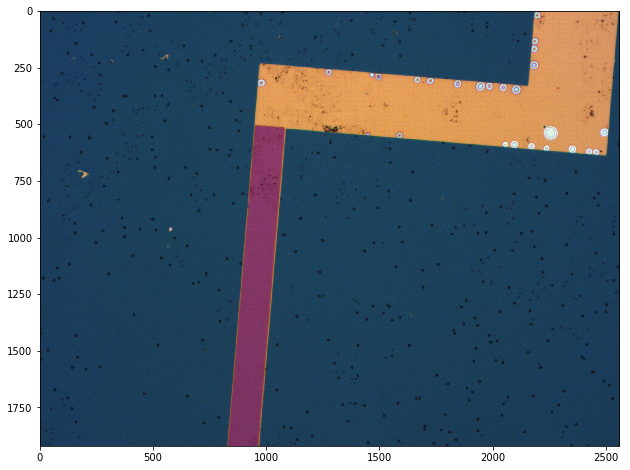

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

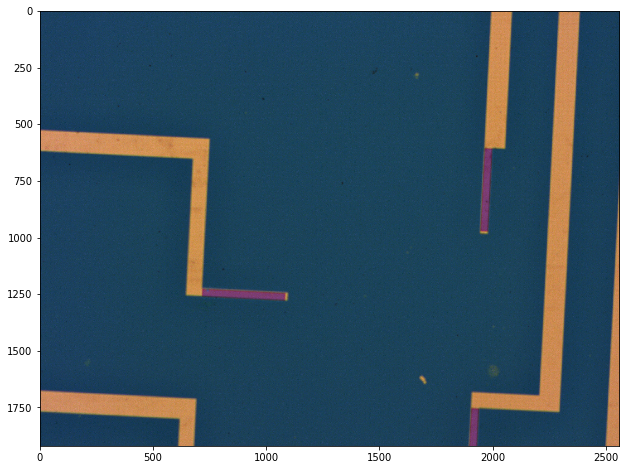

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

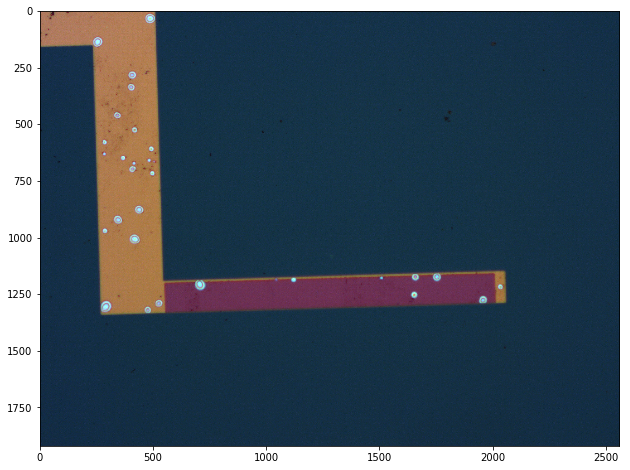

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
#@title Images postbake results
os.chdir('/content/drive/My Drive/Images-microsope/third/semi etched cleaned')
images_files= glob.glob('*.czi') 
df=dicfordf(images_files)  
ImageTabFromdf(df)
